In [15]:
from pipeline.fastfcn_modified import MyDataset, get_dataloader
from matplotlib import pyplot as plt
import numpy as np

In [10]:
dataset = MyDataset(in_dir="training_data/train")

In [33]:
dataset[0][2]

'training_data/train/images/353093_5120_13312_i.jpg'

In [28]:
def display_random(image_tuple=None):
    if image_tuple==None:
        image_tuple=dataset[np.random.randint(0, len(dataset))]
    fig, ax = plt.subplots(ncols=len(image_tuple)-1)
    ax[0].imshow(image_tuple[0])
    ax[1].imshow(image_tuple[1])

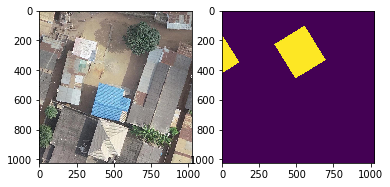

In [31]:
display_random()

In [34]:
!ls training_data/train/images | wc -l
!ls training_data/train/masks | wc -l

21965
21970


In [42]:
%%bash
for file1 in training_data/images/*.ext; do
    file2="${file1%foo.ext}bar.ext"
    echo $file1 $file2
    #if [[ -e "$file2" ]]; then
    #   printf '%s\t%s\n' "$file1" "$file2"
    #fi
done

training_data/images/*.ext training_data/images/*.extbar.ext
